***STEP-1: DATA COLLETION AND DATA ANALYSIS*** 

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('/content/sample_data/car data.csv')
print(car)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [3]:
car.shape


(301, 9)

***a. Getting to know the features of our dataset***

In [4]:
print("Keys of car data:\n", car.keys())

Keys of car data:
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


***b. Finding the categories of our categorical features and plotting the counts***

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  296 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print("Fuel Types:\n", car['Fuel_Type'].value_counts())

Fuel Types:
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


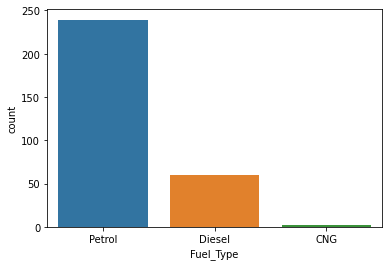

In [7]:
ax = sns.countplot(x="Fuel_Type", data=car)

In [8]:
print("Seller Types:\n", car['Seller_Type'].value_counts())

Seller Types:
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


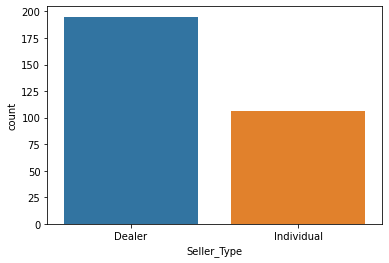

In [9]:
ax = sns.countplot(x="Seller_Type", data=car)

In [10]:
print("Transmission Types:\n", car['Transmission'].value_counts())

Transmission Types:
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


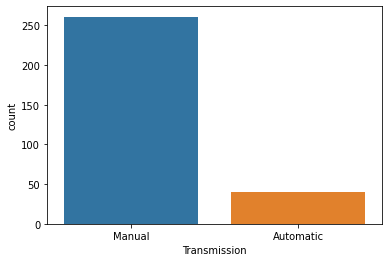

In [11]:
ax = sns.countplot(x="Transmission", data=car)

***c. Checking the features and data types of those featurs in our dataset***

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  296 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


***STEP-2: DATA PREPROCESSING*** 

***a. Imputing Missing values***

In [13]:
#Check for missing values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    5
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
#imputing missing values
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(car[['Selling_Price']])

car['Selling_Price'] = impute.transform(car[['Selling_Price']])
car.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
#Checking if the Imputation was correct or not
car.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350000,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750000,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250000,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850000,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600000,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.250000,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,4.642432,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.500000,8.61,33429,Diesel,Dealer,Manual,0


***b. Feature Engineering***

In [16]:
#Getting the info of our data for finding out the categorical data columns
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None




> i. Handling Categorical Features by Encoding




In [17]:
# encoding "Fuel_Type" Column

car['Fuel_Type'] = car['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2}) 

# encoding "Seller_Type" Column

car['Seller_Type'] = car['Seller_Type'].map({'Dealer':0,'Individual':1}) 

# encoding "Transmission" Column

car['Transmission'] = car['Transmission'].map({'Automatic':0,'Manual':1}) 

In [19]:
print(car.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0  


In [20]:
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB
None


***c. Feature Normalization/Scaling***



> i. Train Test Splitting Data for creating scaled independent features



In [21]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)
Y = car['Selling_Price']
from sklearn.model_selection import train_test_split
#random data splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)

# transform test data
X_test_scaled = scaler.transform(X_test)

***d. Feature Selection***

In [23]:
car_corr = car.corr()
car_corr

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.233810,-0.047584,-0.524342,0.053643,-0.039896,0.000394,-0.182104
Selling_Price,0.233810,1.000000,0.876933,0.032315,0.509261,-0.544225,-0.370469,-0.088033
Present_Price,-0.047584,0.876933,1.000000,0.203647,0.440415,-0.512030,-0.348715,0.008057
Kms_Driven,-0.524342,0.032315,0.203647,1.000000,0.166801,-0.101419,-0.162510,0.089216
Fuel_Type,0.053643,0.509261,0.440415,0.166801,1.000000,-0.352415,-0.080466,-0.055705
Seller_Type,-0.039896,-0.544225,-0.512030,-0.101419,-0.352415,1.000000,0.063240,0.124269
Transmission,0.000394,-0.370469,-0.348715,-0.162510,-0.080466,0.063240,1.000000,-0.050316
Owner,-0.182104,-0.088033,0.008057,0.089216,-0.055705,0.124269,-0.050316,1.000000


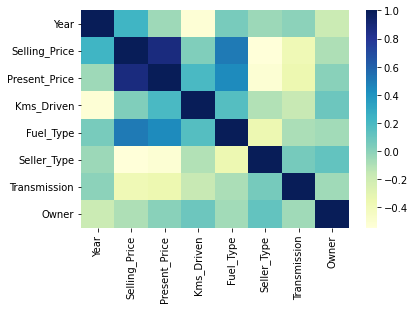

In [24]:
sns.heatmap(car_corr, cmap = 'YlGnBu')

Take a minute to find the column where the correlation value is greater than 0.75 at least twice and we don't find any columns as such from the above heatmap so no need to drop any columns. 

***STEP-3: APPLYING THE MACHINE LEARNING MODELS*** 

**1.** **Linear Regression**

***a. Training the Model and Predicting***

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [24]:
#Fitting the model on training data
lin_reg_model.fit(X_train_scaled,y_train)

# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test_scaled)

***b. Checking Accuracy for Linear Regression Model***

In [25]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8679682337553885


In [26]:
# Mean Absolute Error
error_score = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", error_score)

Mean Absolute Error :  1.253717372738026


***c. Visualizing the Actual Selling prices and Predicted Selling prices for Linear Regression Model***

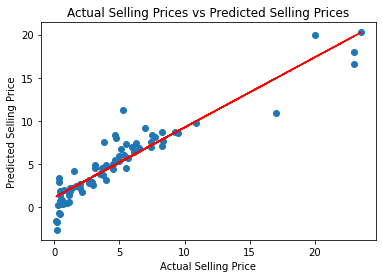

In [27]:
plt.scatter(y_test, test_data_prediction)
z = np.polyfit(y_test, test_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Prices vs Predicted Selling Prices")
plt.show()

**2. Decision Tree Regression**

***a. Training the Model and Predicting***

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [29]:
#Loading the Model
dec_tree_regr = DecisionTreeRegressor()

In [30]:
#Fitting the model on training data
dec_tree_regr.fit(X_train_scaled,y_train)

# prediction on Testing data
test_data_prediction = dec_tree_regr.predict(X_test_scaled)

***b. Checking Accuracy for Decision Tree Model***

In [31]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9237365969953278


In [32]:
# Mean Absolute Error
error_score = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", error_score)

Mean Absolute Error :  0.8644096728307255


***c. Visualizing the Actual Selling prices and Predicted Selling prices for Decision Tree Model***

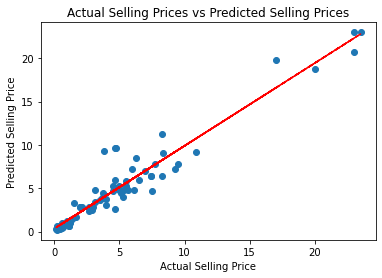

In [33]:
plt.scatter(y_test, test_data_prediction)
z = np.polyfit(y_test, test_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Prices vs Predicted Selling Prices")
plt.show()

**3.** **Random-Forest Regression**

***a. Training the Model and Predicting***

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [35]:
#calling the Model
rand_forest_regr = RandomForestRegressor()

In [36]:
#Fitting the model on training data
rand_forest_regr.fit(X_train_scaled,y_train)

# prediction on Testing data
test_data_prediction = rand_forest_regr.predict(X_test_scaled)

***b. Checking Accuracy for Random Forest Model***

In [37]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9471307784598808


In [38]:
# Mean Absolute Error
error_score = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", error_score)

Mean Absolute Error :  0.7086238264580373


***c. Visualizing the Actual Selling prices and Predicted Selling prices for Random Forest Model***

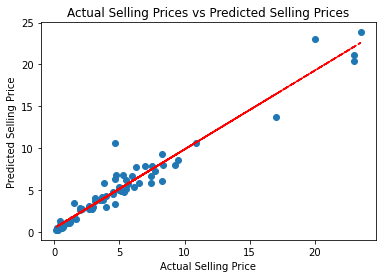

In [39]:
plt.scatter(y_test, test_data_prediction)
z = np.polyfit(y_test, test_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Prices vs Predicted Selling Prices")
plt.show()

**4.** **Gradient Boosting Regression**

***a. Training the Model and Predicting***

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [41]:
#calling the Model
grad_boost_regr = GradientBoostingRegressor(random_state=0)

In [42]:
#Fitting the model on training data
grad_boost_regr.fit(X_train_scaled,y_train)

# prediction on Testing data
test_data_prediction = grad_boost_regr.predict(X_test_scaled)

***b. Checking Accuracy for Gradient Boosting Model***

In [43]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9514885047663275


In [44]:
# Mean Absolute Error
error_score = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error : ", error_score)

Mean Absolute Error :  0.6543698605346198


***c. Visualizing the Actual Selling prices and Predicted Selling prices for Gradient Boosting Model***

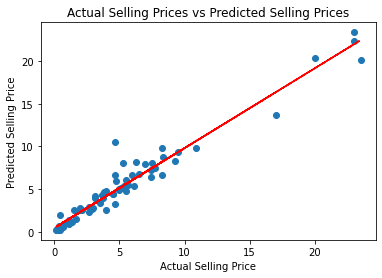

In [45]:
plt.scatter(y_test, test_data_prediction)
z = np.polyfit(y_test, test_data_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual Selling Prices vs Predicted Selling Prices")
plt.show()